In [88]:
from pydub import AudioSegment
import numpy as np
import librosa
from librosa.display import waveplot, specshow
import IPython.display as ipd
import matplotlib.pyplot as plt
import pyworld as pw
import soundfile as sf

In [171]:
%%time
x, fs = librosa.load('001.wav')
x = x.astype('float64')

Wall time: 289 ms


In [172]:
%%time
x, fs = sf.read('001.wav')

Wall time: 1.99 ms


method 1:

In [136]:
f0, t = pw.dio(x, fs)    # raw pitch extractor
f0 = pw.stonemask(x, f0, t, fs)  # pitch refinement
sp = pw.cheaptrick(x, f0, t, fs)  # extract smoothed spectrogram
ap = pw.d4c(x, f0, t, fs)         # extract aperiodicity
y = pw.synthesize(f0, sp, ap, fs)

method 2:

In [124]:
# or using default options
f0, sp, ap = pw.wav2world(x, fs)
y = pw.synthesize(f0, sp, ap, fs)

method 3:

In [144]:
def world_decompose(wav, fs, frame_period = 5.0):
    # Decompose speech signal into f0, spectral envelope and aperiodicity using WORLD
    wav = wav.astype(np.float64)
    f0, timeaxis = pyworld.harvest(wav, fs, frame_period = frame_period) # 这个似乎比dio更好
    sp = pyworld.cheaptrick(wav, f0, t, fs)
    ap = pyworld.d4c(wav, f0, t, fs)
    return f0, t, sp, ap

f0, t, sp, ap = world_decompose(x, fs)

y = pw.synthesize(f0, sp, ap, fs)

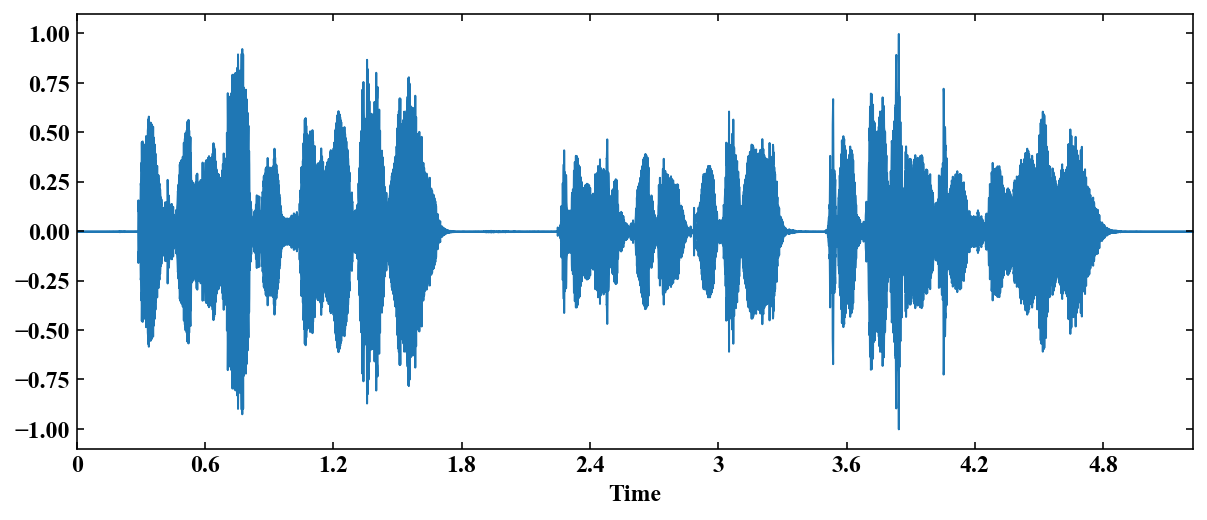

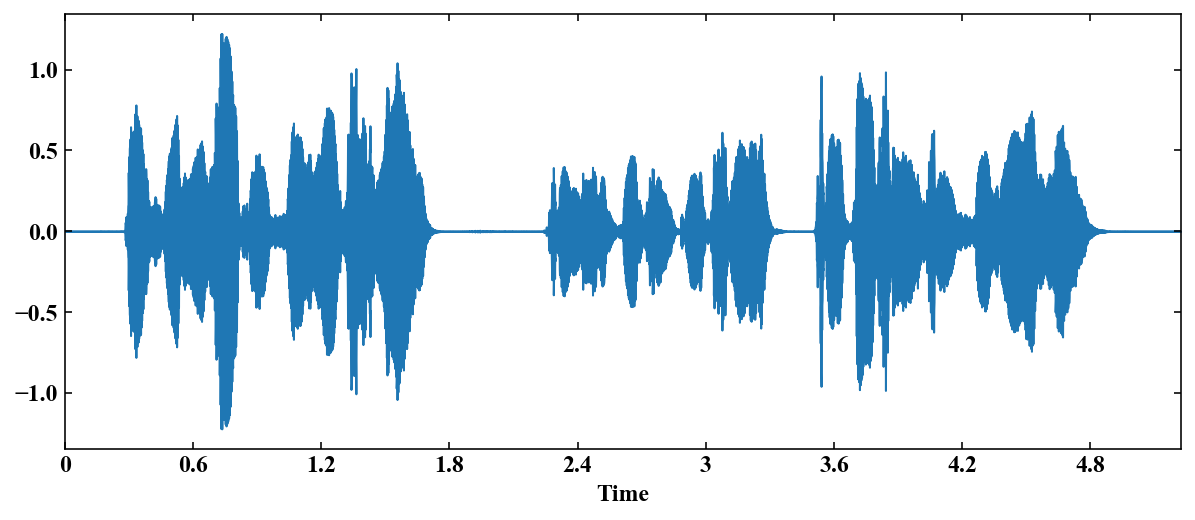

In [141]:
# comparison
plt.figure(figsize=(10,4))
waveplot(x, fs); plt.show()
plt.figure(figsize=(10,4))
waveplot(y, fs); plt.show()

In [142]:
ipd.Audio(x, rate=fs)

In [143]:
ipd.Audio(y, rate=fs)